In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. LOAD DATA FEATURE SELECTION

## 1.1 Glasso

In [2]:
glasso_static = pd.read_csv('../classical_fs/results_GLASSO_statics.csv')
glasso_dynamic = pd.read_csv('../classical_fs/glasso_results_notbalanced.csv')

#### Static

In [3]:
glasso_static.columns = ['Feature', 'Selected']
features_glasso_static = glasso_static[glasso_static['Selected'] == True]['Feature'].tolist()
print("\nSelected Features:")
print(features_glasso_static)
print('\n')


Selected Features:
['Gender', 'SAPSIIIScore']




In [4]:
df_glasso_static = pd.DataFrame(features_glasso_static, columns=['Selected Feature'])

#### Dynamic

In [5]:
glasso_dynamic.columns = ['Feature', 'Selected']
important_features = []
true_counts = glasso_dynamic['Selected'].value_counts()
print(true_counts)

if true_counts.get(True, 0) >= 2:
    important_features = glasso_dynamic[glasso_dynamic['Selected'] == True]['Feature'].tolist()

if important_features:
    print("Important characteristics (At least 2 Times Steps selected):")
    print(important_features)
else:
    print("No relevant characteristics")

Selected
False    565
True     219
Name: count, dtype: int64
Important characteristics (At least 2 Times Steps selected):
['AMG0', 'AMG1', 'AMG2', 'AMG3', 'AMG4', 'AMG5', 'AMG6', 'AMG7', 'AMG8', 'AMG9', 'AMG11', 'AMG12', 'AMG13', 'ATF1', 'ATF3', 'ATF5', 'ATF6', 'ATF7', 'ATF8', 'ATF10', 'ATF11', 'ATF12', 'ATF13', 'CF20', 'CF21', 'CF22', 'CF23', 'CF24', 'CF25', 'CF26', 'CF27', 'CF28', 'CF29', 'CF210', 'CF211', 'CF212', 'CF213', 'GCC0', 'GCC1', 'GCC2', 'GCC3', 'GCC4', 'GCC5', 'GCC6', 'GCC7', 'GCC8', 'GCC9', 'GCC10', 'GCC11', 'GCC12', 'GCC13', 'LIN0', 'LIN1', 'LIN2', 'LIN3', 'LIN4', 'LIN5', 'LIN6', 'LIN7', 'LIN8', 'LIN9', 'LIN10', 'LIN11', 'LIN12', 'LIN13', 'OTR0', 'OTR1', 'OTR2', 'OTR3', 'OTR4', 'OTR5', 'OTR6', 'OTR7', 'OTR8', 'OTR9', 'OTR10', 'OTR11', 'OTR12', 'OTR13', 'PEN0', 'PEN1', 'PEN2', 'PEN3', 'PEN4', 'PEN5', 'PEN6', 'PEN7', 'PEN8', 'PEN9', 'PEN10', 'PEN11', 'PEN12', 'PEN13', 'TTC0', 'TTC1', 'TTC2', 'TTC3', 'TTC4', 'TTC5', 'TTC6', 'TTC7', 'TTC8', 'TTC9', 'TTC10', 'TTC11', 'TTC12',

In [6]:
original_features = [
    'AMG', 'ATF', 'CAR', 'CF1', 'CF2', 'CF3', 'CF4', 'Falta', 'GCC', 'GLI', 'LIN', 'LIP', 'MAC', 'MON', 
    'NTI', 'OTR', 'OXA', 'PAP', 'PEN', 'POL','QUI', 'SUL', 'TTC', 'pc_acinet', 'pc_enterob', 'pc_enteroc', 
    'pc_pseud', 'pc_staph', 'pc_stenot', 'pc_no_germ', 'isVM', 'numberOfPatients', 'numberOfPatientsMR', 
    'neighbor_AMG', 'neighbor_ATF', 'neighbor_CAR', 'neighbor_CF1', 'neighbor_CF2', 'neighbor_CF3', 
    'neighbor_CF4', 'neighbor_Falta', 'neighbor_GCC', 'neighbor_GLI', 'neighbor_LIN', 'neighbor_LIP', 
    'neighbor_MAC', 'neighbor_MON', 'neighbor_NTI', 'neighbor_OTR', 'neighbor_OXA', 'neighbor_PAP', 
    'neighbor_PEN', 'neighbor_POL', 'neighbor_QUI', 'neighbor_SUL', 'neighbor_TTC'
]

# List to store the original variable names that appear at least twice
features_glasso_dyn = []

# Iterate over the original variable names
for original_name in original_features:
    # Count how many times the base name appears in the list of variables with time step
    count = sum(1 for var in important_features if var.startswith(original_name) and var != original_name)
    
    # If the base name appears at least 2 times, add it to the relevant variables list. 
    # This is, we keep the features that are selected in a minimum of 2 time steps
    if count >= 2:
        features_glasso_dyn.append(original_name)

# Print the relevant variables
print("Relevant variables (selected for at least two time steps):")
print(features_glasso_dyn)

Relevant variables (selected for at least two time steps):
['AMG', 'ATF', 'CF2', 'GCC', 'LIN', 'OTR', 'PEN', 'TTC', 'pc_enteroc', 'isVM', 'neighbor_CAR', 'neighbor_CF4', 'neighbor_GLI', 'neighbor_MAC', 'neighbor_PAP', 'neighbor_QUI']


In [7]:
df_glasso_dyn = pd.DataFrame(features_glasso_dyn, columns=['Selected Feature'])

#### Save .csv

In [8]:
combined_glasso = pd.concat([
    df_glasso_dyn['Selected Feature'],
    df_glasso_static['Selected Feature']], ignore_index=True)

combined_glasso.to_csv('glasso_selected_features.csv', index=False)

## 1.2 CMI

In [9]:
cmi_static = pd.read_csv('../classical_fs/results_MI_Cond_static.csv')
cmi_dynamic = pd.read_csv('../classical_fs/results_MI_COND_dynamic.csv')

#### Static

In [10]:
features_cmi_static = cmi_static[cmi_static['MIValues'] >= 1e-02]
print(features_cmi_static['Keys'].to_list())

features_cmi_static = features_cmi_static[['Keys']]
features_cmi_static.columns = ['Selected Feature']

['SAPSIIIScore', 'Age', 'YearOfAdmission', 'MonthOfAdmission']


#### Dynamic

In [11]:
features_cmi_dyn = cmi_dynamic[cmi_dynamic['MIValues'] >= 1e-02]
print(features_cmi_dyn['Keys'].to_list())

features_cmi_dyn = features_cmi_dyn[['Keys']]
features_cmi_dyn.columns = ['Selected Feature']

['neighbor_QUI', 'neighbor_CAR', 'neighbor_PAP', 'neighbor_OXA', 'numberOfPatients', 'neighbor_CF3', 'neighbor_PEN']


#### Save .csv

In [12]:
combined_cmi = pd.concat([
    features_cmi_dyn['Selected Feature'],
    features_cmi_static['Selected Feature']], ignore_index=True)

combined_cmi.to_csv('cmi_selected_features.csv', index=False)

## 1.3 Bootstrap

In [13]:
bootstrap_static = pd.read_csv('../classical_fs/results_bootstrapping_static.csv')
bootstrap_dynamic = pd.read_csv('../classical_fs/results_bootstrapping.csv')

#### Static

In [14]:
features_bootstrap_static = bootstrap_static[bootstrap_static['selected'] == 'Y']
print(features_bootstrap_static['features'].to_list())

features_bootstrap_static = features_bootstrap_static[['features']]
features_bootstrap_static.columns = ['Selected Feature']

['Age', 'Gender', 'SAPSIIIScore', 'YearOfAdmission']


#### Dynamic

In [15]:
important_features = []
true_counts = bootstrap_dynamic['selected'].value_counts()
print(true_counts)

if true_counts.get('Y', 0) >= 2:
    important_features = bootstrap_dynamic[bootstrap_dynamic['selected'] == 'Y']['features'].tolist()

if important_features:
    print("Feature and time step selected:")
    print(important_features)
else:
    print("No relevant characteristics")

selected
N    716
Y     68
Name: count, dtype: int64
Feature and time step selected:
['AMG2', 'AMG9', 'AMG11', 'AMG13', 'ATF4', 'ATF5', 'ATF12', 'CAR2', 'CF19', 'CF22', 'CF29', 'CF42', 'CF44', 'Falta0', 'GCC1', 'GCC2', 'GCC7', 'GCC11', 'LIN2', 'LIN4', 'LIP6', 'MAC2', 'NTI1', 'NTI2', 'OTR6', 'OXA2', 'PEN2', 'PEN4', 'QUI2', 'SUL2', 'TTC2', 'TTC4', 'TTC9', 'TTC11', 'pc_enterob2', 'pc_enterob9', 'pc_pseud1', 'pc_pseud2', 'pc_pseud11', 'pc_stenot2', 'isVM2', 'isVM7', 'isVM11', 'numberOfPatients6', 'numberOfPatients8', 'numberOfPatientsMR2', 'neighbor_AMG2', 'neighbor_ATF1', 'neighbor_ATF2', 'neighbor_CAR6', 'neighbor_CAR8', 'neighbor_CF12', 'neighbor_CF19', 'neighbor_CF32', 'neighbor_CF311', 'neighbor_CF46', 'neighbor_CF48', 'neighbor_GLI2', 'neighbor_GLI11', 'neighbor_MAC11', 'neighbor_MON2', 'neighbor_MON11', 'neighbor_PAP2', 'neighbor_PAP11', 'neighbor_POL9', 'neighbor_QUI11', 'neighbor_SUL2', 'neighbor_SUL11']


In [16]:
original_features = [
    'AMG', 'ATF', 'CAR', 'CF1', 'CF2', 'CF3', 'CF4', 'Falta', 'GCC', 'GLI', 'LIN', 'LIP', 'MAC', 'MON', 
    'NTI', 'OTR', 'OXA', 'PAP', 'PEN', 'POL','QUI', 'SUL', 'TTC', 'pc_acinet', 'pc_enterob', 'pc_enteroc', 
    'pc_pseud', 'pc_staph', 'pc_stenot', 'pc_no_germ', 'isVM', 'numberOfPatients', 'numberOfPatientsMR', 
    'neighbor_AMG', 'neighbor_ATF', 'neighbor_CAR', 'neighbor_CF1', 'neighbor_CF2', 'neighbor_CF3', 
    'neighbor_CF4', 'neighbor_Falta', 'neighbor_GCC', 'neighbor_GLI', 'neighbor_LIN', 'neighbor_LIP', 
    'neighbor_MAC', 'neighbor_MON', 'neighbor_NTI', 'neighbor_OTR', 'neighbor_OXA', 'neighbor_PAP', 
    'neighbor_PEN', 'neighbor_POL', 'neighbor_QUI', 'neighbor_SUL', 'neighbor_TTC'
]

# List to store the original variable names that appear at least twice
features_bootstrap_dyn = []

# Iterate over the original variable names
for original_name in original_features:
    # Count how many times the base name appears in the list of variables with time step
    count = sum(1 for var in important_features if var.startswith(original_name) and var != original_name)
    
    # If the base name appears at least 2 times, add it to the relevant variables list. 
    # This is, we keep the features that are selected in a minimum of 2 time steps
    if count >= 2:
        features_bootstrap_dyn.append(original_name)

# Print the relevant variables
print("Relevant variables (selected for at least two time steps):")
print(features_bootstrap_dyn)


Relevant variables (selected for at least two time steps):
['AMG', 'ATF', 'CF2', 'CF4', 'GCC', 'LIN', 'NTI', 'PEN', 'TTC', 'pc_enterob', 'pc_pseud', 'isVM', 'numberOfPatients', 'neighbor_ATF', 'neighbor_CAR', 'neighbor_CF1', 'neighbor_CF3', 'neighbor_CF4', 'neighbor_GLI', 'neighbor_MON', 'neighbor_PAP', 'neighbor_SUL']


In [17]:
df_bootstrap_dyn = pd.DataFrame(features_bootstrap_dyn, columns=['Selected Feature'])

#### Save .csv

In [18]:
combined_bootstrap = pd.concat([
    df_bootstrap_dyn['Selected Feature'],
    features_bootstrap_static['Selected Feature']], ignore_index=True)

combined_bootstrap.to_csv('bootstrap_selected_features.csv', index=False)

## 1.4 Majority voting

In [19]:
bootstrap = pd.read_csv('bootstrap_selected_features.csv')
glasso = pd.read_csv('glasso_selected_features.csv')
cmi = pd.read_csv('cmi_selected_features.csv')

combined_df = pd.concat([
    bootstrap['Selected Feature'],
    glasso['Selected Feature'],
    cmi['Selected Feature'],
], ignore_index=True)

feature_counts = combined_df.value_counts()

majority_threshold = 2

selected_features = feature_counts[feature_counts >= majority_threshold].index.tolist()

print("Majority voting:")
print(selected_features)

combined_MJ = pd.DataFrame(selected_features, columns=['Selected Features'])
combined_MJ.to_csv('majority_voting_selected_features.csv', index=False)

Majority voting:
['SAPSIIIScore', 'neighbor_PAP', 'neighbor_CAR', 'AMG', 'numberOfPatients', 'neighbor_QUI', 'YearOfAdmission', 'Gender', 'Age', 'neighbor_GLI', 'neighbor_CF4', 'ATF', 'neighbor_CF3', 'LIN', 'CF2', 'TTC', 'PEN', 'isVM', 'GCC']


# 2. LOAD DATA PFI

In [20]:
MLP = pd.read_csv('MLP_selected_features.csv')
GRU = pd.read_csv('GRU_selected_features.csv')

NM = pd.concat([
    MLP['Selected Feature'],
    GRU['Selected Feature']], ignore_index=True)

LFLR = pd.read_csv('LFLR_selected_features.csv')
LFCO = pd.read_csv('LFCO_selected_features.csv')
JHF = pd.read_csv('JHF_selected_features.csv')
FHSI = pd.read_csv('FHSI_selected_features.csv')


# 3. HEATMAP

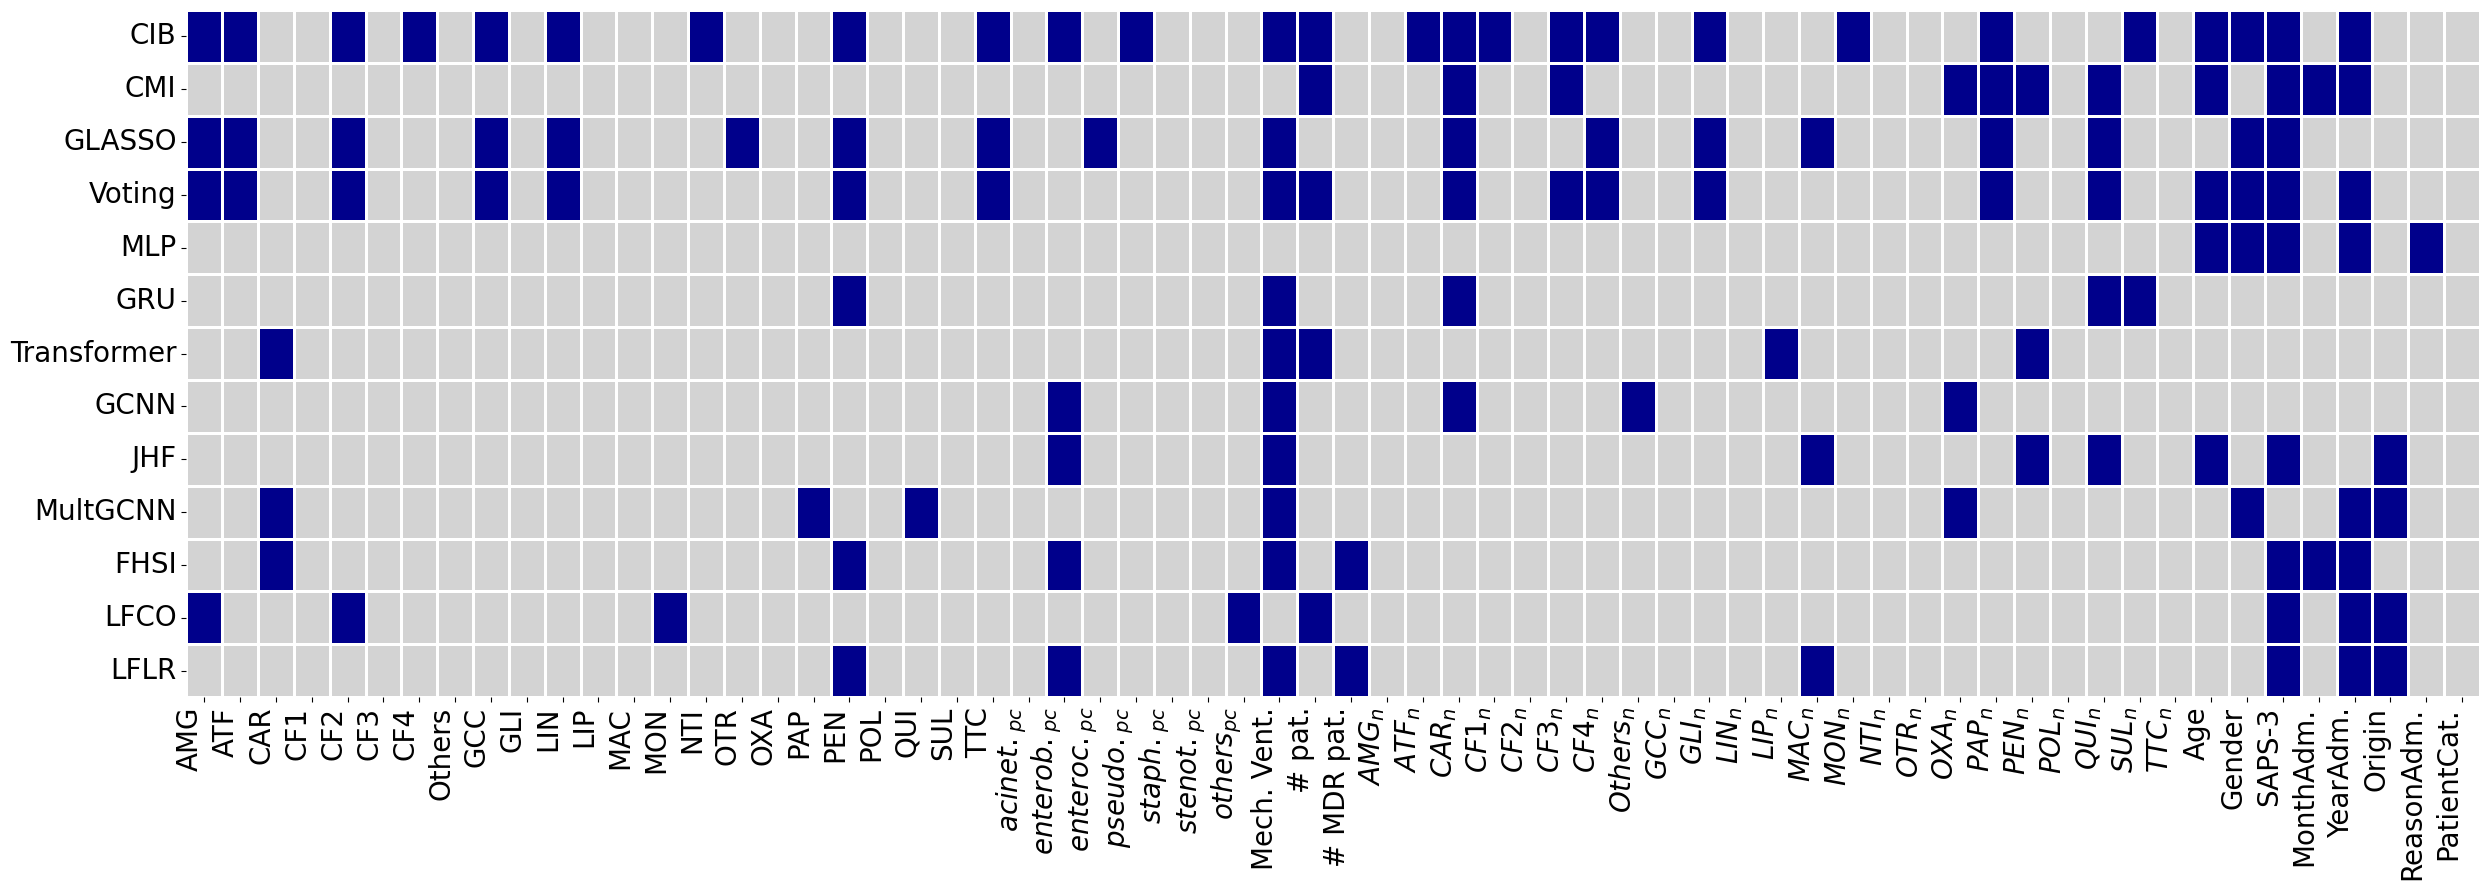

In [21]:
features = [
    'AMG', 'ATF', 'CAR', 'CF1', 'CF2', 'CF3', 'CF4', 'Falta', 'GCC', 'GLI',
    'LIN', 'LIP', 'MAC', 'MON', 'NTI', 'OTR', 'OXA', 'PAP', 'PEN', 'POL',
    'QUI', 'SUL', 'TTC', 'pc_acinet', 'pc_enterob', 'pc_enteroc',
    'pc_pseud', 'pc_staph', 'pc_stenot', 'pc_no_germ', 'isVM',
    'numberOfPatients', 'numberOfPatientsMR', 'neighbor_AMG',
    'neighbor_ATF', 'neighbor_CAR', 'neighbor_CF1', 'neighbor_CF2',
    'neighbor_CF3', 'neighbor_CF4', 'neighbor_Falta', 'neighbor_GCC',
    'neighbor_GLI', 'neighbor_LIN', 'neighbor_LIP', 'neighbor_MAC',
    'neighbor_MON', 'neighbor_NTI', 'neighbor_OTR', 'neighbor_OXA',
    'neighbor_PAP', 'neighbor_PEN', 'neighbor_POL', 'neighbor_QUI',
    'neighbor_SUL', 'neighbor_TTC', 'Age', 'Gender', 'SAPSIIIScore',
    'MonthOfAdmission', 'YearOfAdmission', 'Origin', 'ReasonAdmission',
    'PatientCategory'
]


MLP = pd.read_csv('MLP_selected_features.csv')
GRU = pd.read_csv('GRU_selected_features.csv')
Transformer = pd.read_csv('Transformer_selected_features.csv')
GCN = pd.read_csv('GNN_selected_features.csv')
MULTGCN = pd.read_csv('MultGNN_selected_features.csv')
LFLR = pd.read_csv('LFLR_selected_features.csv')
LFCO = pd.read_csv('LFCO_selected_features.csv')
JHF = pd.read_csv('JHF_selected_features.csv')
FHSI = pd.read_csv('FHSI_selected_features.csv')

heatmap_data = pd.DataFrame(0, index=['CIB', 'CMI', 'GLASSO', 'Voting', 'MLP', 'GRU', 'Transformer', 'GCNN', 'JHF', 'MultGCNN', 'FHSI', 'LFCO', 'LFLR'], columns=features)

for feature in features:
    heatmap_data.loc['CIB', feature] = 1 if feature in combined_bootstrap.values else 0
    heatmap_data.loc['CMI', feature] = 1 if feature in combined_cmi.values else 0
    heatmap_data.loc['GLASSO', feature] = 1 if feature in combined_glasso.values else 0
    heatmap_data.loc['Voting', feature] = 1 if feature in combined_MJ.values else 0
    
    heatmap_data.loc['MLP', feature] = 1 if feature in MLP['Selected Feature'].values else 0
    heatmap_data.loc['GRU', feature] = 1 if feature in GRU['Selected Feature'].values else 0
    heatmap_data.loc['Transformer', feature] = 1 if feature in Transformer['Selected Feature'].values else 0
    heatmap_data.loc['GCNN', feature] = 1 if feature in GCN['Selected Feature'].values else 0
    heatmap_data.loc['LFLR', feature] = 1 if feature in LFLR['Selected Feature'].values else 0
    heatmap_data.loc['LFCO', feature] = 1 if feature in LFCO['Selected Feature'].values else 0
    heatmap_data.loc['JHF', feature] = 1 if feature in JHF['Selected Feature'].values else 0
    heatmap_data.loc['MultGCNN', feature] = 1 if feature in MULTGCN['Selected Feature'].values else 0
    heatmap_data.loc['FHSI', feature] = 1 if feature in FHSI['Selected Feature'].values else 0
    

# Define the tags for X axis
keys = [
    'AMG', 'ATF', 'CAR', 'CF1', 'CF2', 'CF3', 'CF4', 'Others', 'GCC', 'GLI', 'LIN', 'LIP', 'MAC',
    'MON', 'NTI',  'OTR', 'OXA', 'PAP', 'PEN', 'POL', 'QUI', 'SUL', 'TTC',
    r'$acinet._{pc}$', r'$enterob._{pc}$', r'$enteroc._{pc}$', 
    r'$pseudo._{pc}$', r'$staph._{pc}$', r'$stenot._{pc}$', r'$others_{pc}$',
    'Mech. Vent.', '# pat.', '# MDR pat.',
    r'$AMG_{n}$', r'$ATF_{n}$', r'$CAR_{n}$', r'$CF1_{n}$', r'$CF2_{n}$', 
    r'$CF3_{n}$', r'$CF4_{n}$', r'$Others_{n}$', r'$GCC_{n}$', r'$GLI_{n}$', 
    r'$LIN_{n}$', r'$LIP_{n}$', r'$MAC_{n}$', r'$MON_{n}$', r'$NTI_{n}$', 
    r'$OTR_{n}$', r'$OXA_{n}$', r'$PAP_{n}$', r'$PEN_{n}$', r'$POL_{n}$', 
    r'$QUI_{n}$', r'$SUL_{n}$', r'$TTC_{n}$', 'Age', 'Gender', 'SAPS-3',
    'MonthAdm.', 'YearAdm.', 'Origin', 'ReasonAdm.',
    'PatientCat.'
]


plt.figure(figsize=(25, 9)) 
custom_palette = ["lightgrey", "darkblue"]


heatmap = sns.heatmap(heatmap_data, cmap=sns.color_palette(custom_palette), cbar=False, linewidths=1, 
                       vmin=0, vmax=1, square=False)


yticks_pos = range(len(heatmap_data.index))
heatmap.set_yticks([y + 0.5 for y in yticks_pos]) 
heatmap.set_yticklabels(heatmap_data.index, rotation=0, ha='right', va='center', fontsize=20)
heatmap.set_xticklabels(keys, rotation=90, ha='right', fontsize=20)

plt.tight_layout() 
plt.savefig("heatmap.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

### NOTE: The figures are finally edited in power point, version included in the paper. 